In [1]:
from qiskit_aer import AerSimulator
from qiskit import *

import supermarq
from qiskit.providers.fake_provider import *
import numpy as np 
import os

########## INPUT ############
f=5 # number of fake_backend want to choose
lower_limit= 3 # the lower limit of qubits for the circuit
upper_limit= 20 # the lower limit of qubits for the circuit
steps= 3 #jump in qubit numbers
name_of_algo='ghz'

In [2]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
import random; selected_fakes = random.sample(all_fakes, f)
selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list

[qiskit.providers.fake_provider.backends.paris.fake_paris.FakeParisV2,
 qiskit.providers.fake_provider.backends.nairobi.fake_nairobi.FakeNairobiV2,
 qiskit.providers.fake_provider.backends.vigo.fake_vigo.FakeVigoV2,
 qiskit.providers.fake_provider.backends.lagos.fake_lagos.FakeLagosV2,
 qiskit.providers.fake_provider.backends.auckland.fake_auckland.FakeAuckland]

In [3]:
benchmarks=[]
for i in range(lower_limit,upper_limit,steps):
    label = name_of_algo+str(i)
    benchmarks.append((supermarq.ghz.GHZ(i),label))
for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("--------------------------",i[1],"---------------------------")
    #circuit.draw(output="mpl")
    print(circuit.draw())

-------------------------- ghz3 ---------------------------
     ┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2 
-------------------------- ghz6 ---------------------------
     ┌───┐          ┌─┐                              
q_0: ┤ H ├──■───────┤M├──────────────────────────────
     └───┘┌─┴─┐     └╥┘     ┌─┐                      
q_1: ─────┤ X ├──■───╫──────┤M├──────────────────────
          └───┘┌─┴─┐ ║      └╥┘     ┌─┐              
q_2: ──────────┤ X ├─╫───■───╫──────┤M├──────────────
               └───┘ ║ ┌─┴─┐ ║      └╥┘     ┌─┐      
q_3: ────────────────╫─┤ X ├─╫───■───╫──────┤M├──────
                     ║ └───┘ ║ ┌─┴─┐ ║      └╥┘┌─┐   
q_4: ────────────────╫───────╫─┤ X ├─╫───■───╫─┤M├───
                     ║       ║ └───┘ ║ ┌─┴─┐ ║ └╥┘┌─┐
q_5: ───────────

In [4]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'ghz3': [0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0], 'ghz6': [0.3333333333333333, 1.0, 0.8333333333333334, 0.40476190476190477, 0.0, 0], 'ghz9': [0.2222222222222222, 1.0, 0.8888888888888888, 0.28888888888888886, 0.0, 0], 'ghz12': [0.16666666666666666, 1.0, 0.9166666666666666, 0.22435897435897437, 0.0, 0], 'ghz15': [0.13333333333333333, 1.0, 0.9333333333333333, 0.18333333333333332, 0.0, 0], 'ghz18': [0.1111111111111111, 1.0, 0.9444444444444444, 0.15497076023391812, 0.0, 0]}


In [5]:
jobs =[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    print("------------------------BACKEND-NAME :: ", backend().name)
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        score_list=[]
        for i in range(0,5):
            job = backend().run(circuit, shots=1000)
            result=job.result()
            counts = job.result(0).get_counts()
            score = benchmark.score(counts)
            score_list.append(score)
        score = np.mean(score_list) 
        sd = np.std(score_list)
        print(label," :: ",score,"                       SD :: ",sd,"  time_taken=",job.result(0).time_taken)
        #counts=job.result(0).count()
        jobs.append((label,benchmark,backend,job,score,sd))
#jobs

=============SCORES OF ALL THE CIRCUITS=============
------------------------BACKEND-NAME ::  fake_paris
ghz3  ::  0.9120043833582603                        SD ::  0.00813177812773198   time_taken= 0.19414186477661133
ghz6  ::  0.6501879692094239                        SD ::  0.01024188170094244   time_taken= 0.20592141151428223
ghz9  ::  0.6041505133414976                        SD ::  0.016075074748392777   time_taken= 0.12331247329711914
ghz12  ::  0.5794872523086457                        SD ::  0.01869417990374382   time_taken= 0.1916637420654297
ghz15  ::  0.5268467923963203                        SD ::  0.0122968087731094   time_taken= 1.1170899868011475
ghz18  ::  0.44398925840897824                        SD ::  0.009997369961006735   time_taken= 7.102993488311768
------------------------BACKEND-NAME ::  fake_nairobi
ghz3  ::  0.9146339912063037                        SD ::  0.008724820981249486   time_taken= 0.03159189224243164
ghz6  ::  0.8344458909381818                    

In [6]:
all_scores={}  
all_fake_names=[]
all_fake_scores=[]
for i in selected_fakes:
    fakes=i
    #print("SELCETED_FAKES:: ",i)
    i={}
    for label,benchmark,backend,job,score,sd in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(fakes().name)
    all_scores[device_scores]= i
    all_fake_scores.append(i)
    all_fake_names.append(device_scores)   
#print(all_scores)    

USED BACKEND:: fake_paris ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9120043833582603


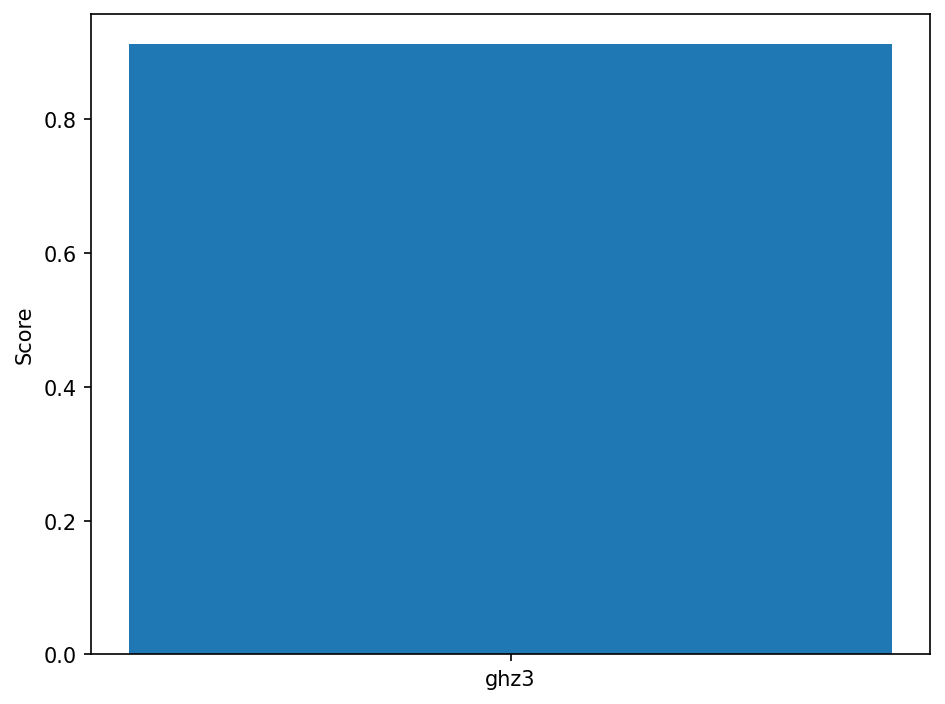

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: ghz6 ; SCORE = 0.6501879692094239


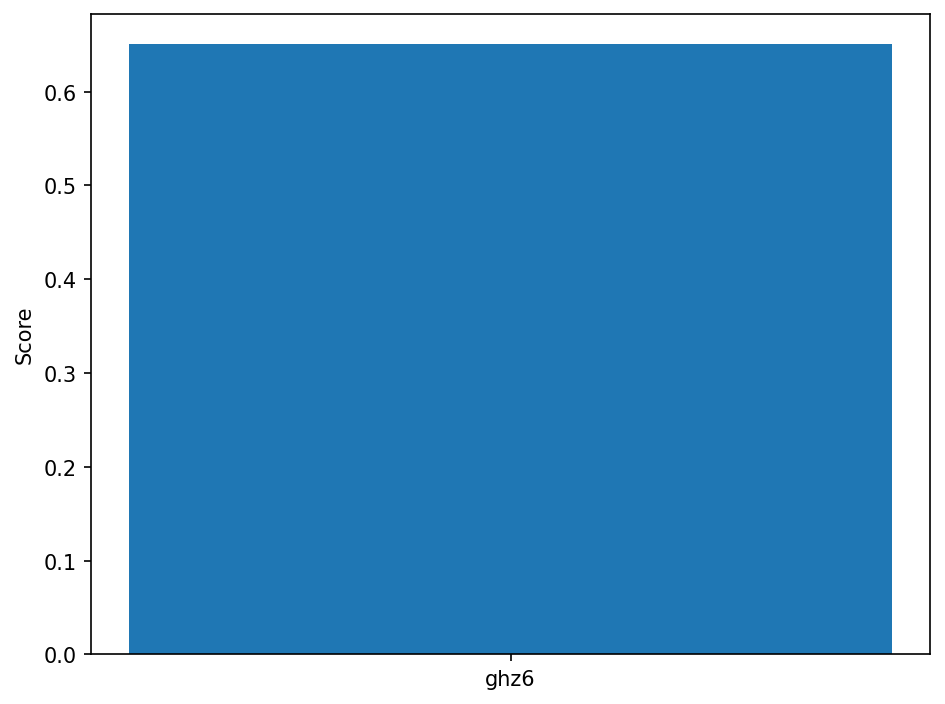

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: ghz9 ; SCORE = 0.6041505133414976


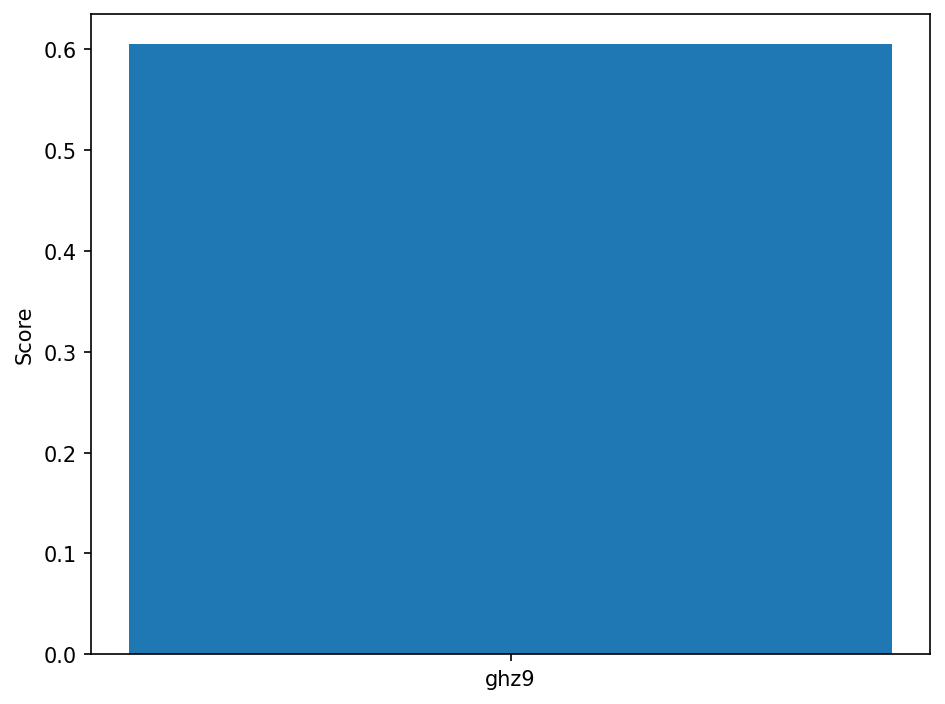

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: ghz12 ; SCORE = 0.5794872523086457


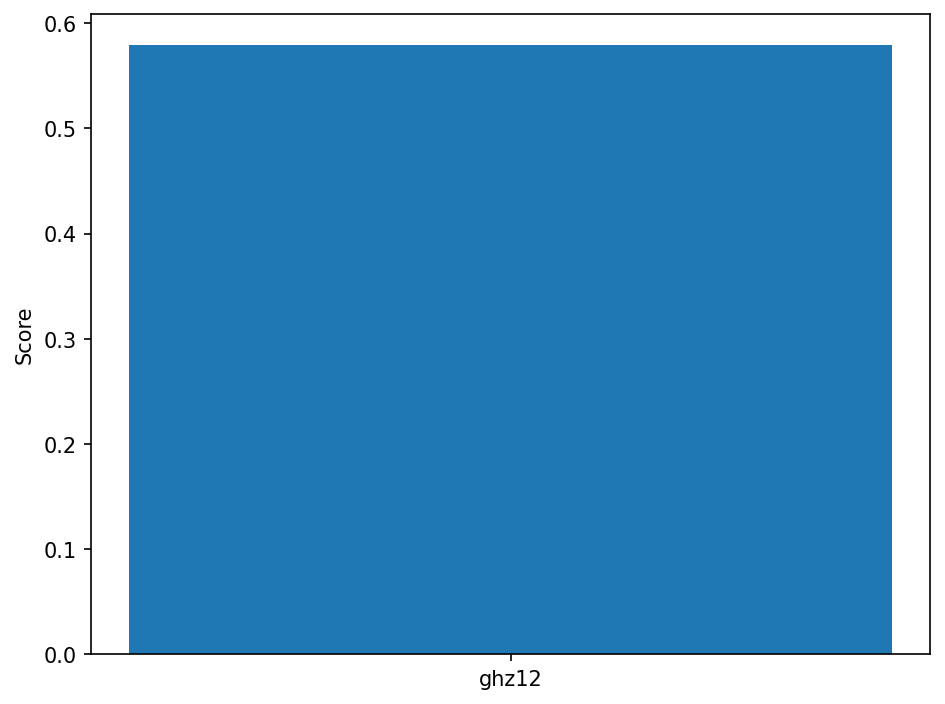

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: ghz15 ; SCORE = 0.5268467923963203


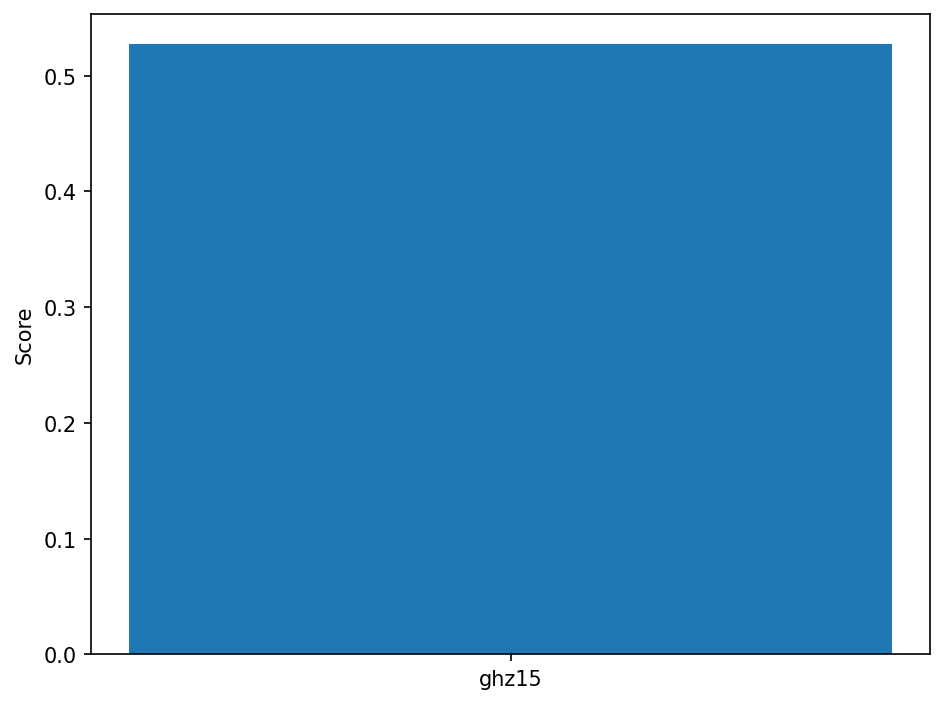

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: ghz18 ; SCORE = 0.44398925840897824


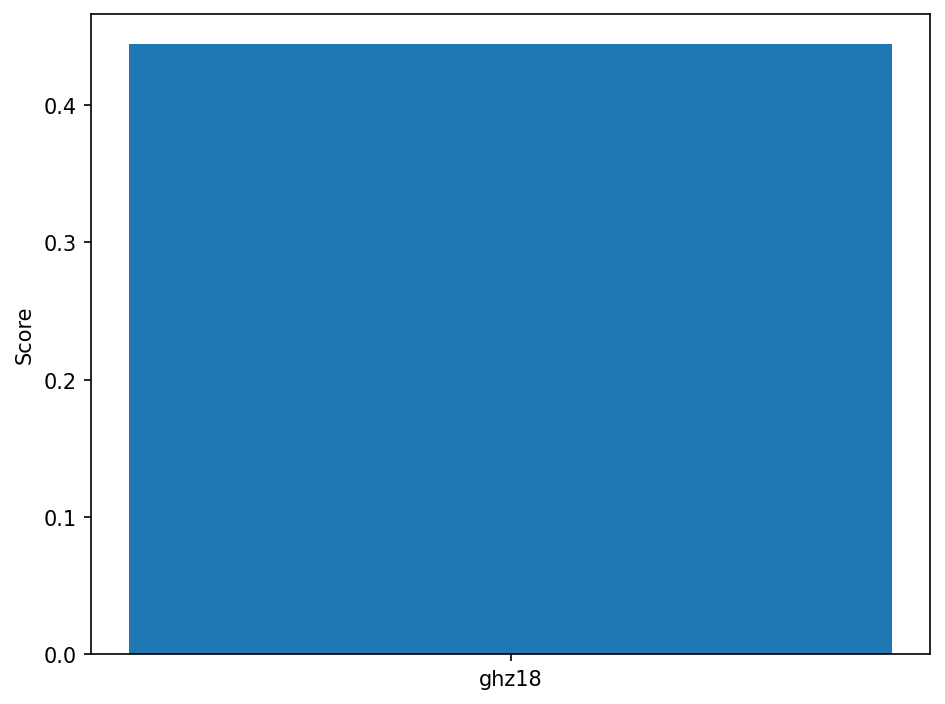

-----------------------------------------------------------
USED BACKEND:: fake_nairobi ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9146339912063037


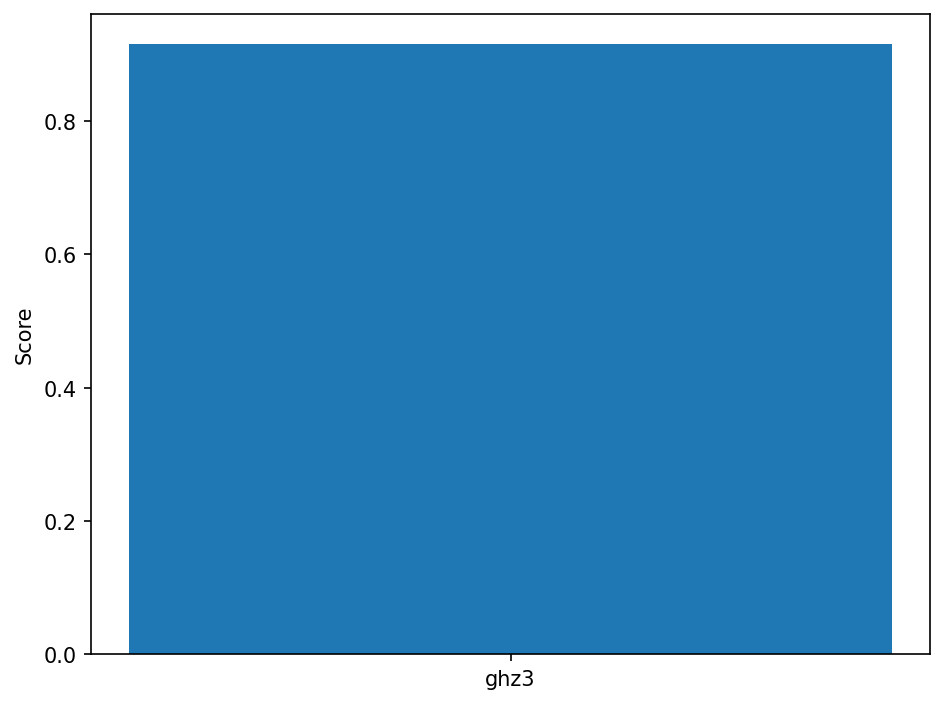

-----------------------------------------------------------
USED BACKEND:: fake_nairobi ; CIRCUIT_NAME: ghz6 ; SCORE = 0.8344458909381818


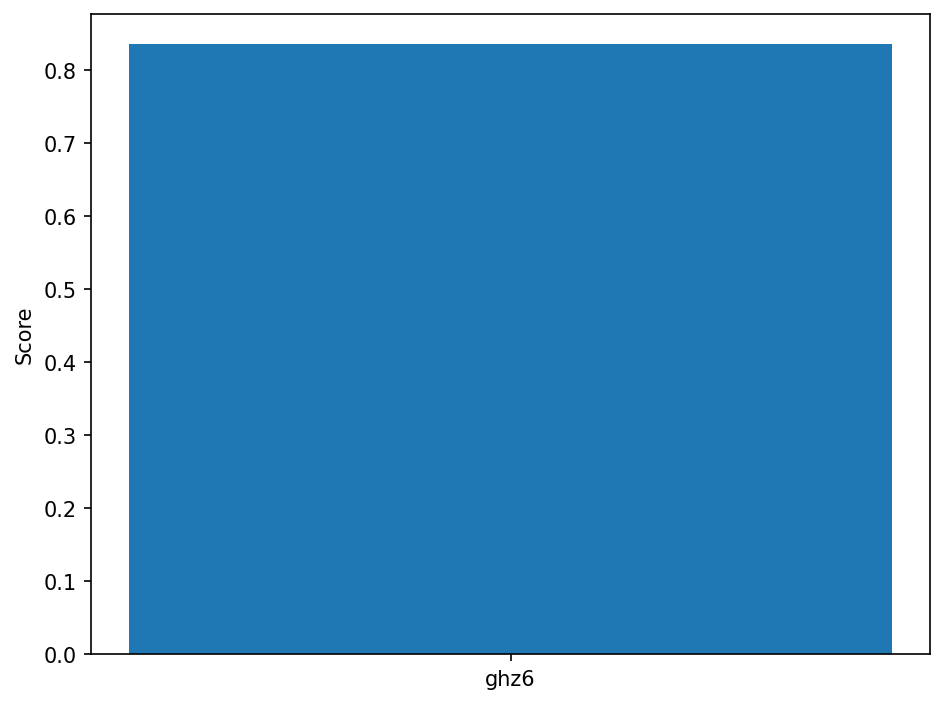

-----------------------------------------------------------
USED BACKEND:: fake_nairobi ; CIRCUIT_NAME: ghz9 ; SCORE = 0.8141224779096252


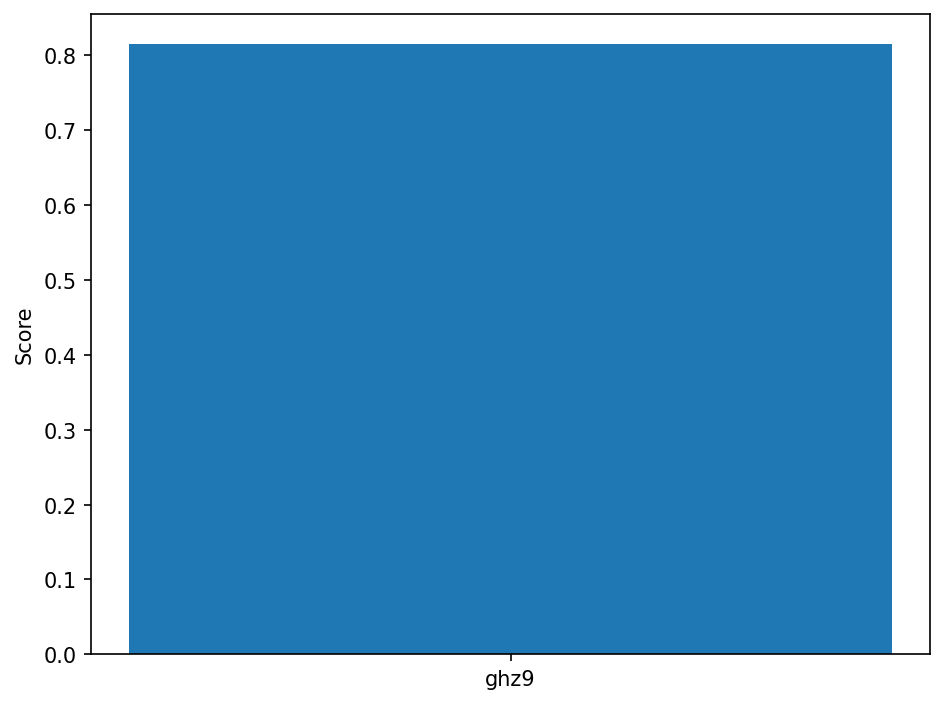

-----------------------------------------------------------
USED BACKEND:: fake_nairobi ; CIRCUIT_NAME: ghz12 ; SCORE = 0.8006791867688128


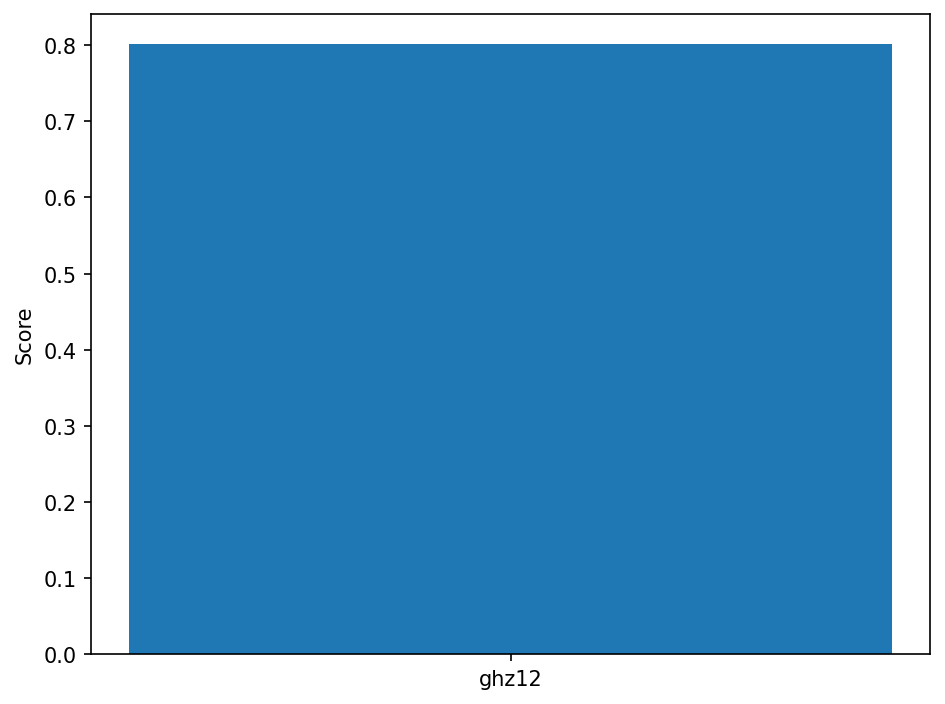

-----------------------------------------------------------
USED BACKEND:: fake_nairobi ; CIRCUIT_NAME: ghz15 ; SCORE = 0.7997279260896969


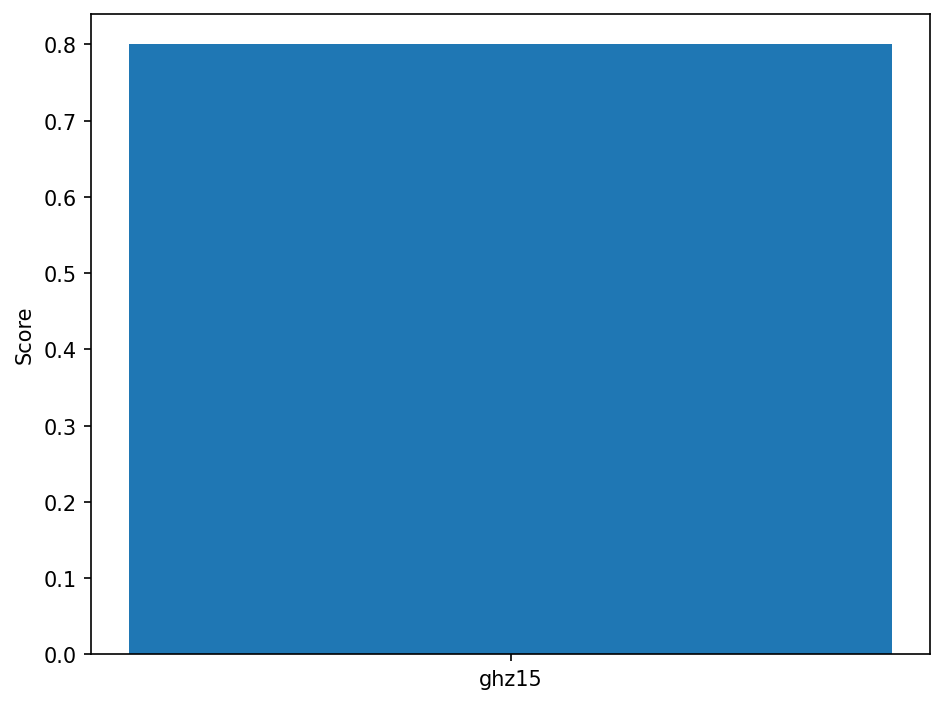

-----------------------------------------------------------
USED BACKEND:: fake_nairobi ; CIRCUIT_NAME: ghz18 ; SCORE = 0.8223308314583953


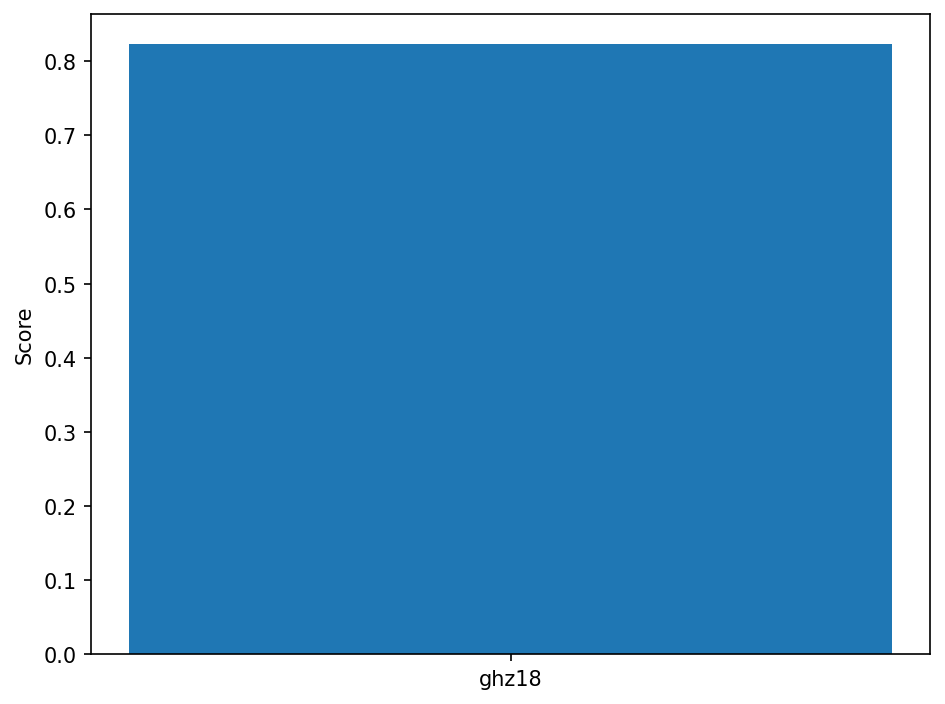

-----------------------------------------------------------
USED BACKEND:: fake_vigo ; CIRCUIT_NAME: ghz3 ; SCORE = 0.8866851835188421


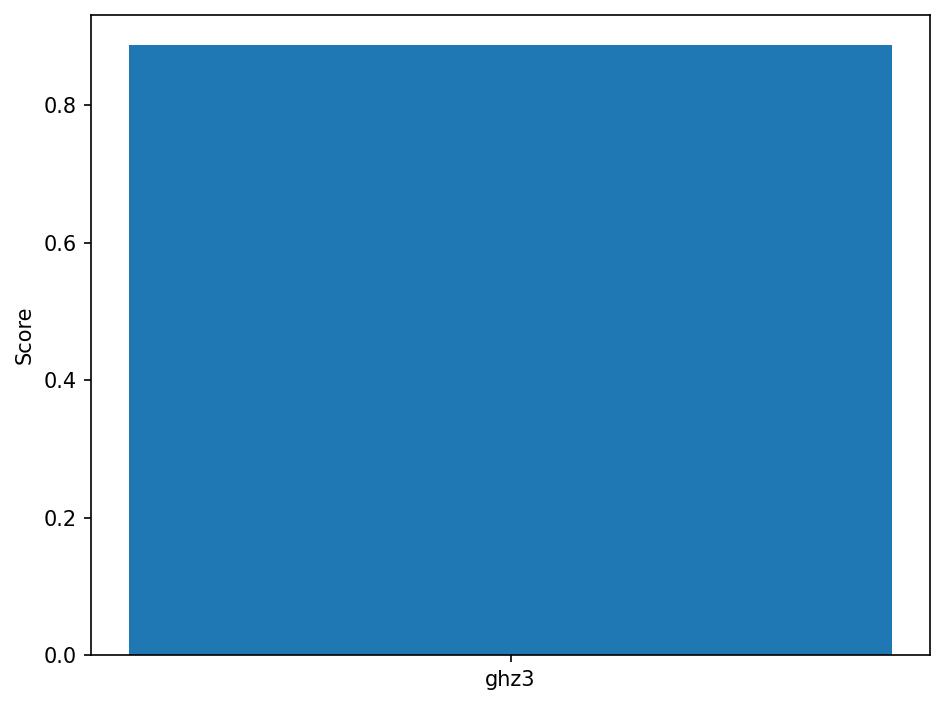

-----------------------------------------------------------
USED BACKEND:: fake_vigo ; CIRCUIT_NAME: ghz6 ; SCORE = 0.8278700924491564


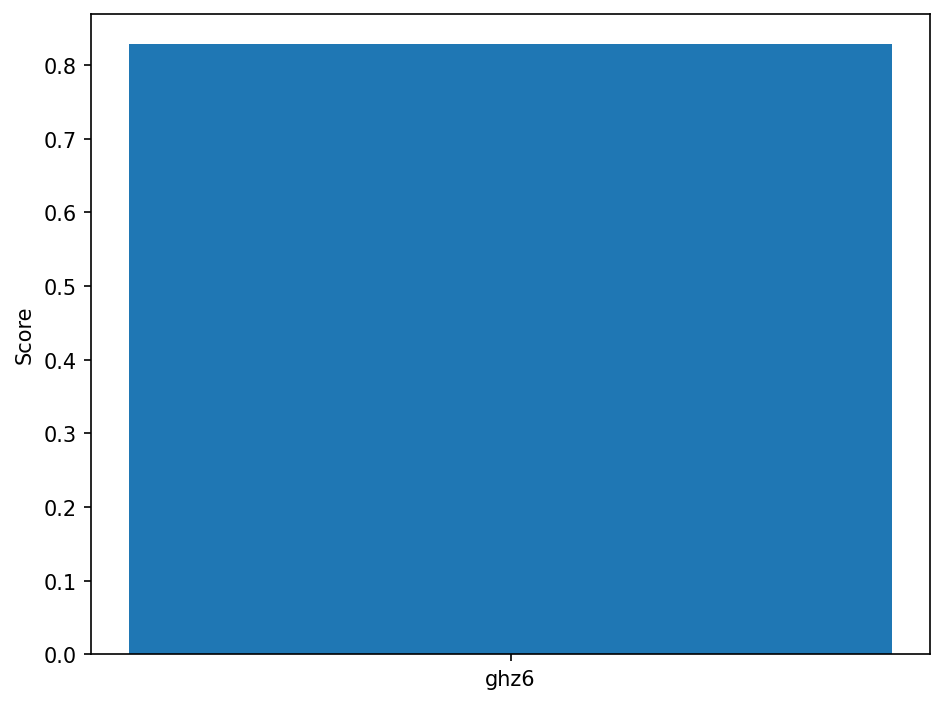

-----------------------------------------------------------
USED BACKEND:: fake_vigo ; CIRCUIT_NAME: ghz9 ; SCORE = 0.8275017717768025


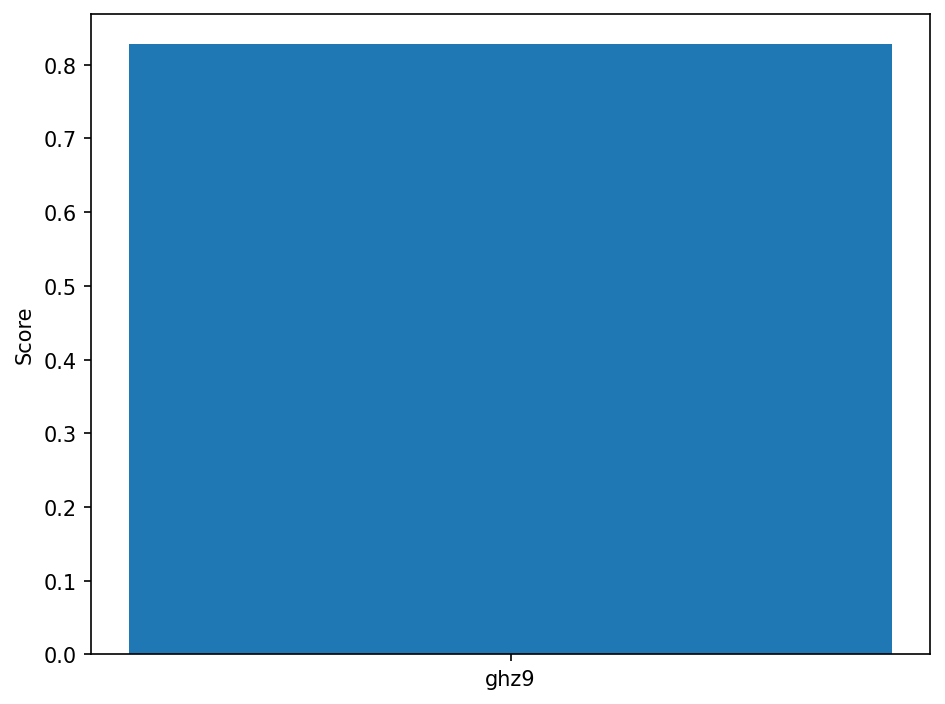

-----------------------------------------------------------
USED BACKEND:: fake_vigo ; CIRCUIT_NAME: ghz12 ; SCORE = 0.8332742481910522


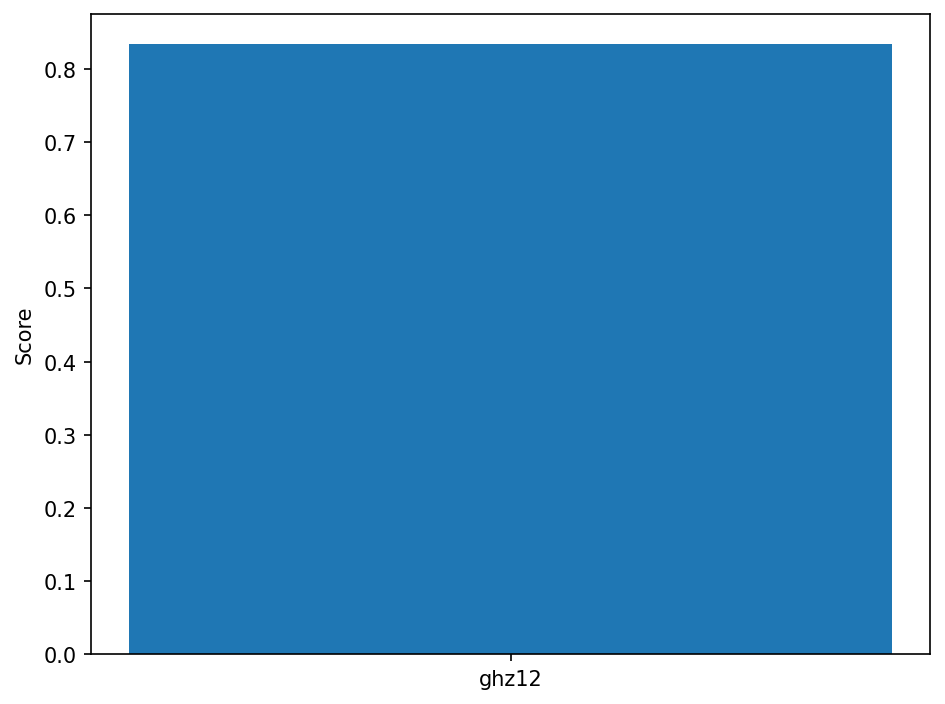

-----------------------------------------------------------
USED BACKEND:: fake_vigo ; CIRCUIT_NAME: ghz15 ; SCORE = 0.8347216164783087


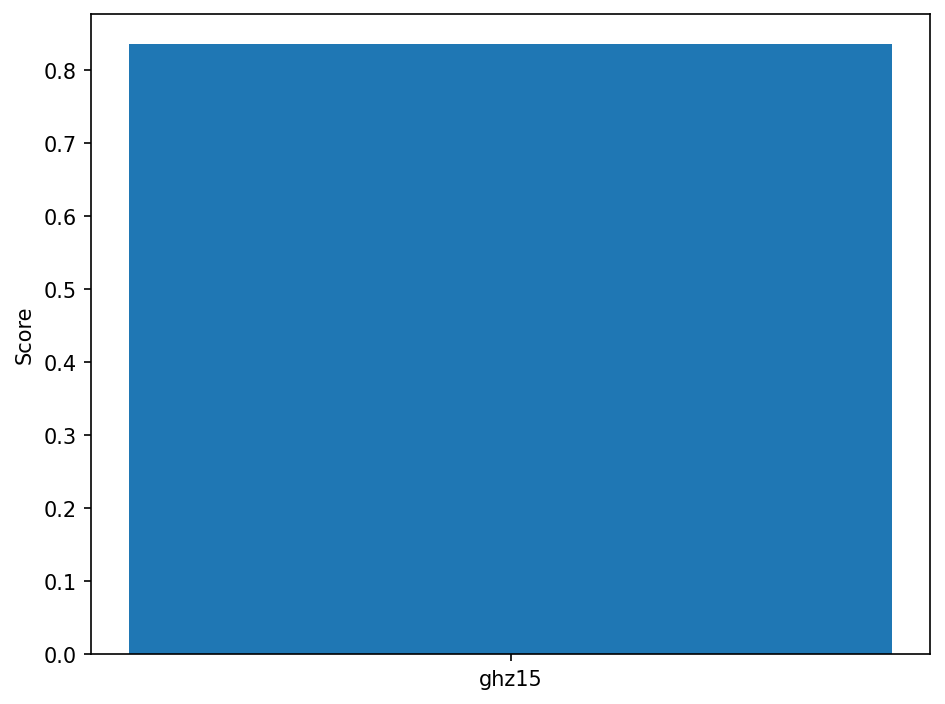

-----------------------------------------------------------
USED BACKEND:: fake_vigo ; CIRCUIT_NAME: ghz18 ; SCORE = 0.8315520805937471


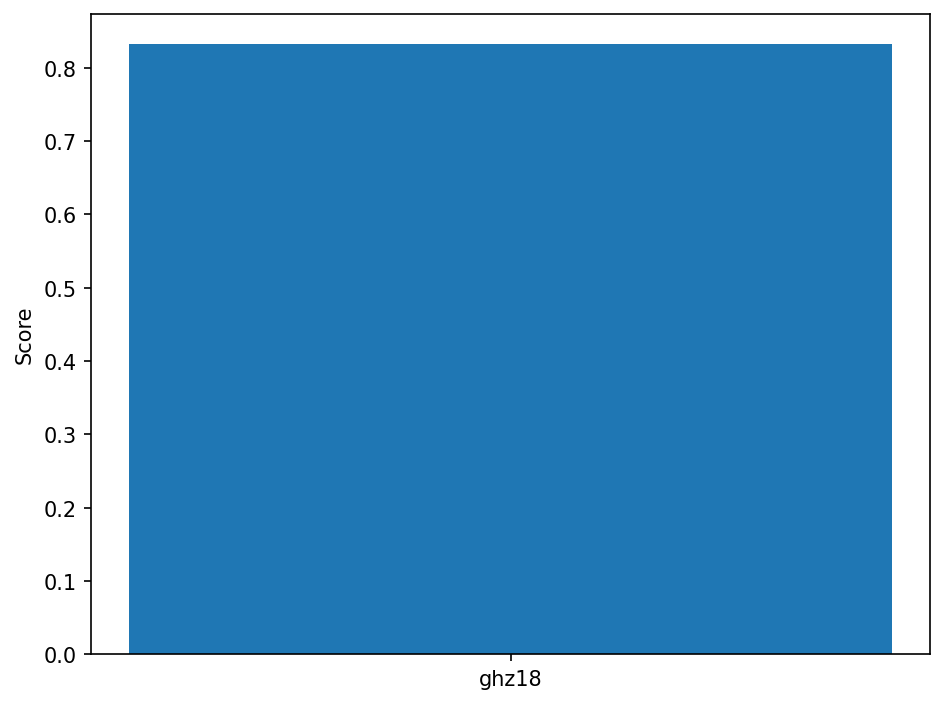

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz3 ; SCORE = 0.958969478142962


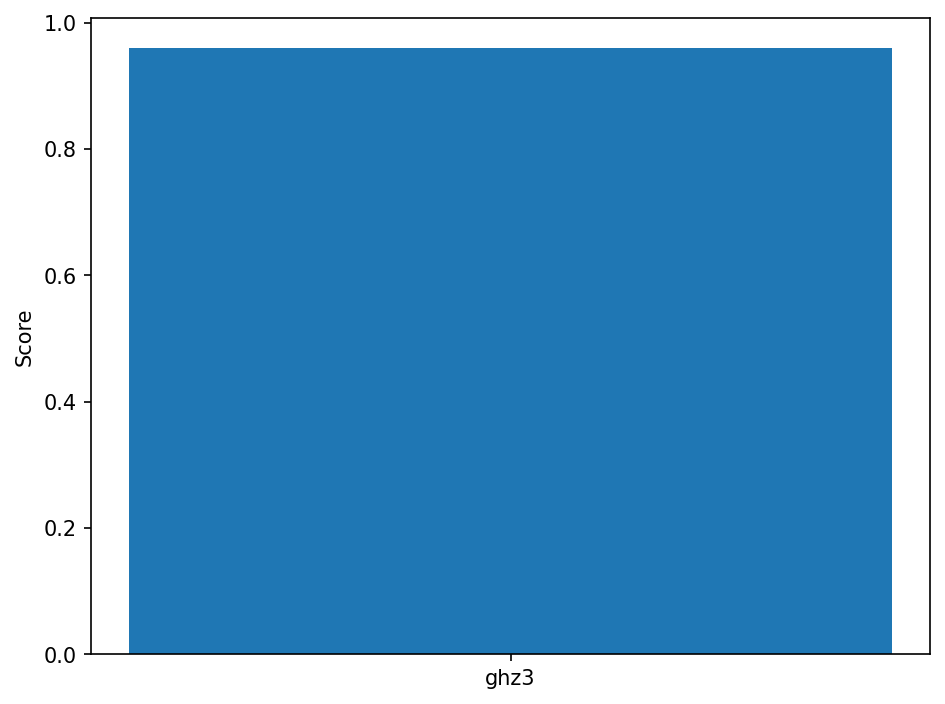

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz6 ; SCORE = 0.9344564337929635


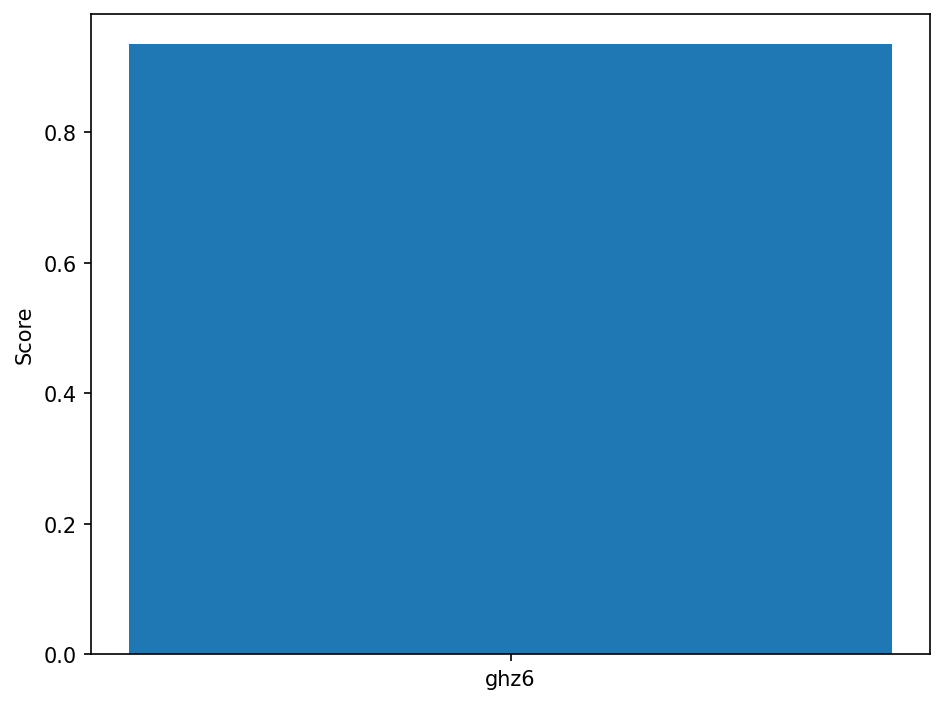

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz9 ; SCORE = 0.9171745026897117


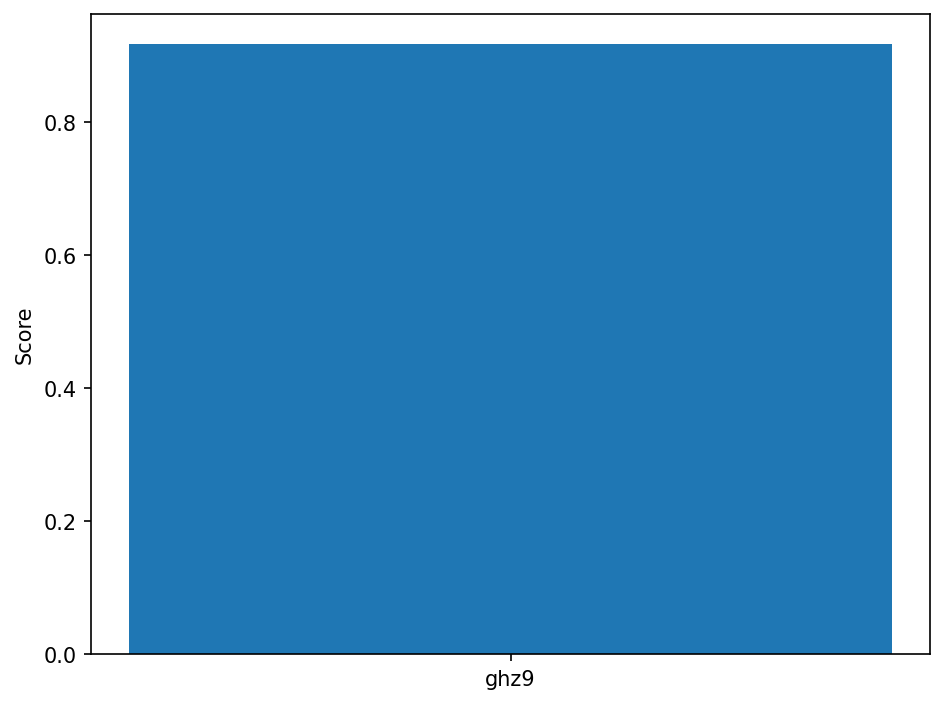

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz12 ; SCORE = 0.9180904716774123


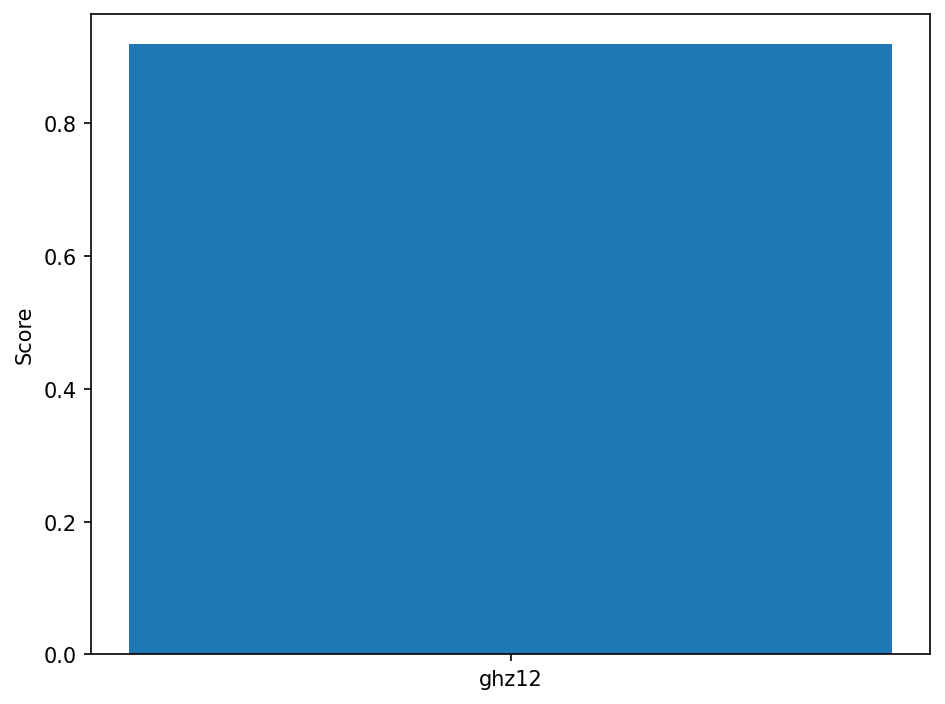

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz15 ; SCORE = 0.9169324668449812


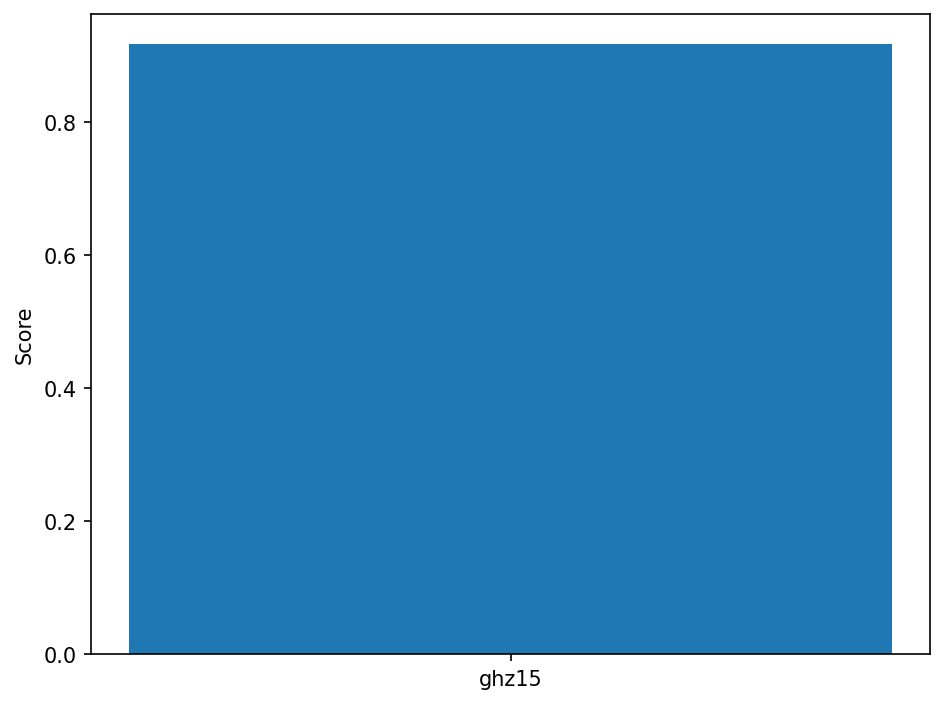

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz18 ; SCORE = 0.9254015692808986


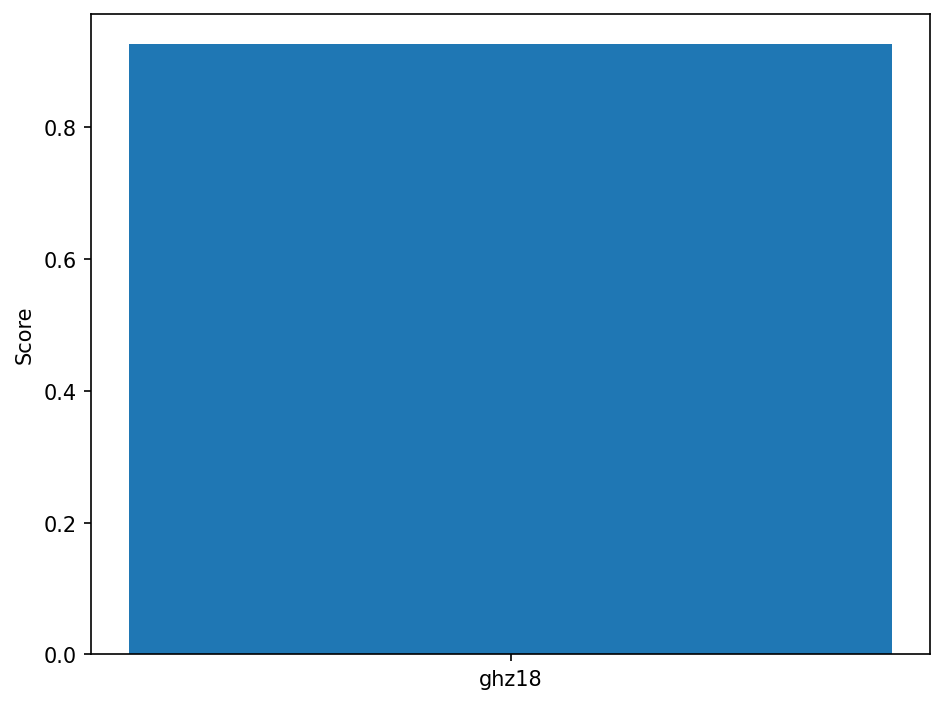

-----------------------------------------------------------
USED BACKEND:: fake_auckland ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9442356189825505


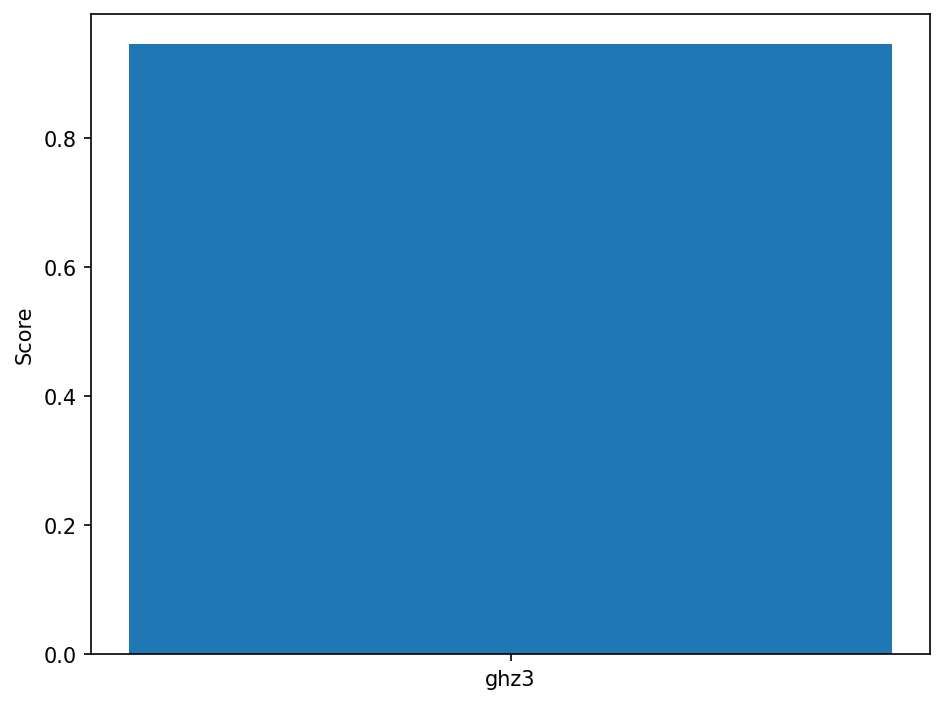

-----------------------------------------------------------
USED BACKEND:: fake_auckland ; CIRCUIT_NAME: ghz6 ; SCORE = 0.9123398438921442


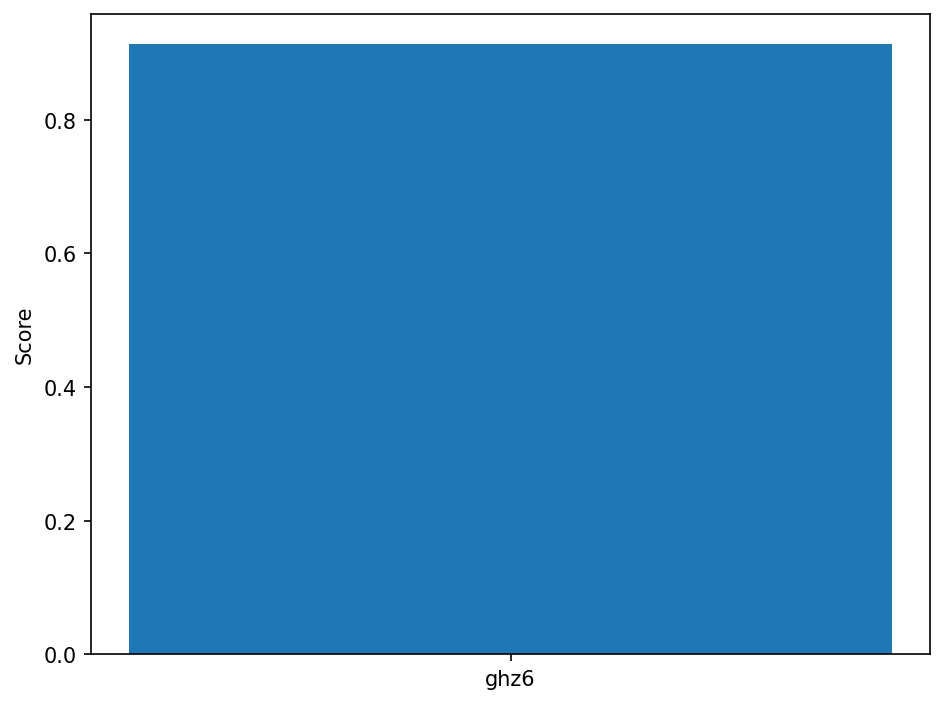

-----------------------------------------------------------
USED BACKEND:: fake_auckland ; CIRCUIT_NAME: ghz9 ; SCORE = 0.8668999086238859


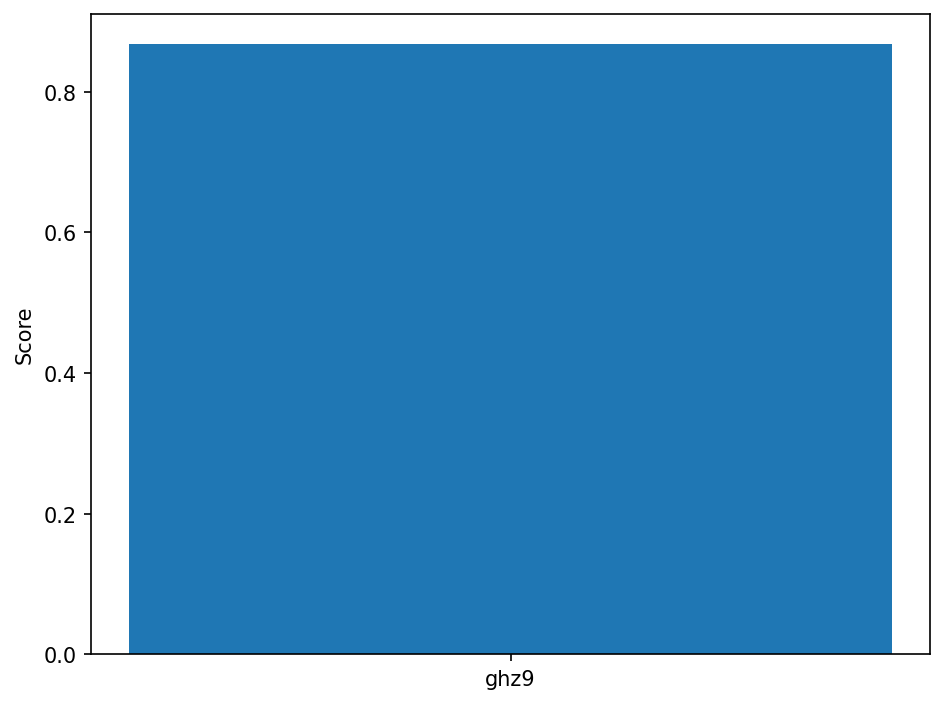

-----------------------------------------------------------
USED BACKEND:: fake_auckland ; CIRCUIT_NAME: ghz12 ; SCORE = 0.8344008143255854


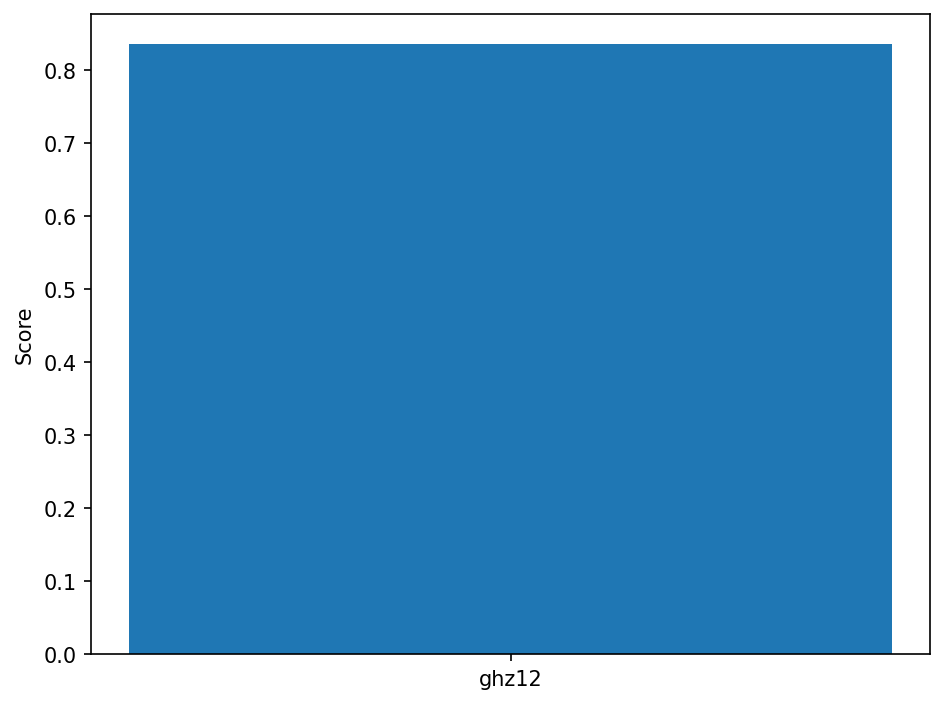

-----------------------------------------------------------
USED BACKEND:: fake_auckland ; CIRCUIT_NAME: ghz15 ; SCORE = 0.8143478718114


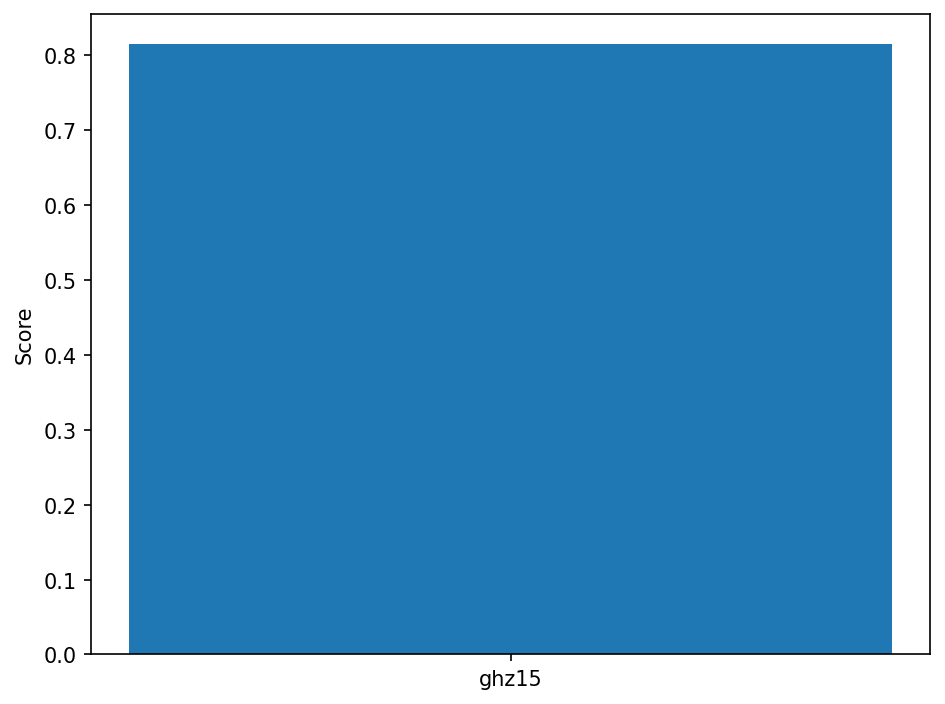

-----------------------------------------------------------
USED BACKEND:: fake_auckland ; CIRCUIT_NAME: ghz18 ; SCORE = 0.747891610708536


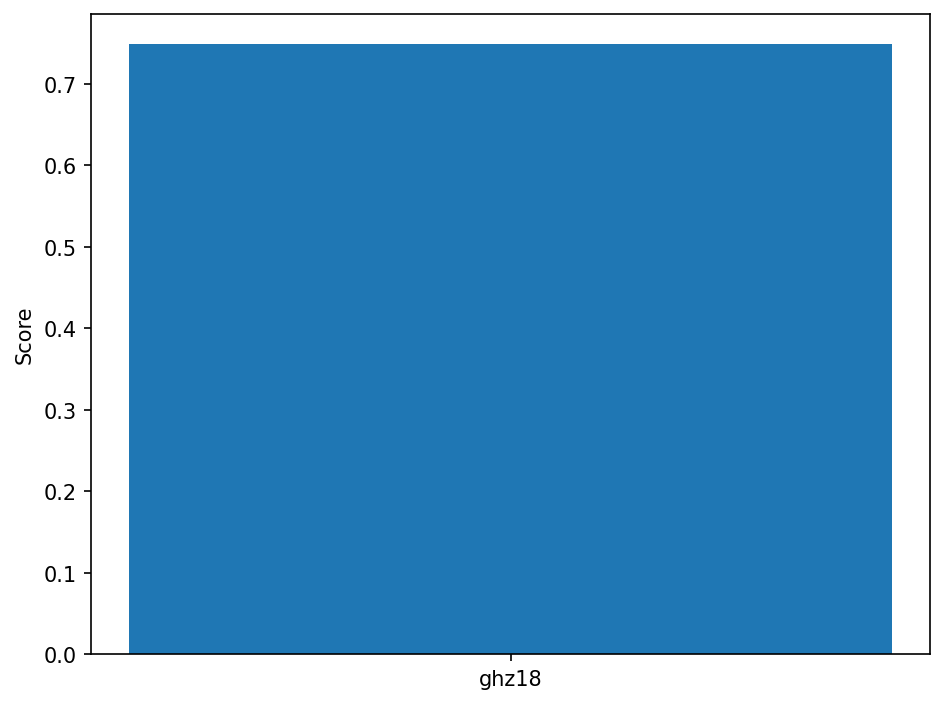

-----------------------------------------------------------


In [7]:
for label,benchmark,backend,job,score,sd in jobs:
    print("USED BACKEND::",backend().name,"; CIRCUIT_NAME:",label, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

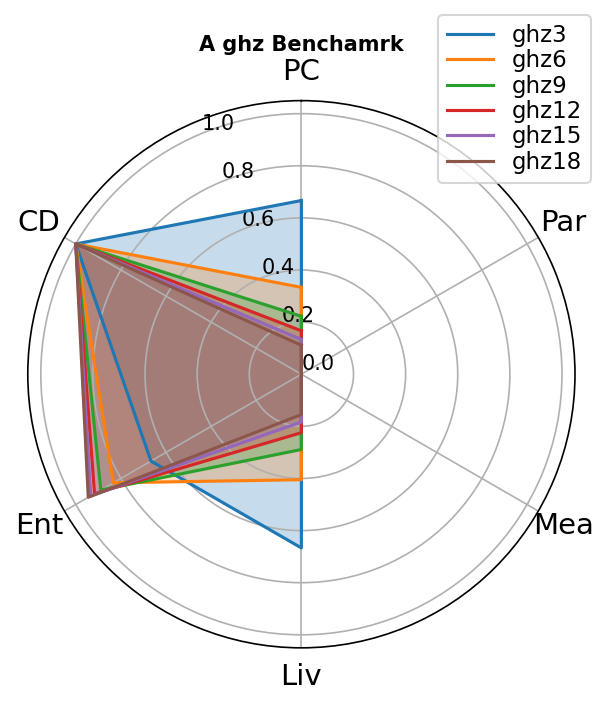

In [8]:
names=[]
scores=[]
X="A "+name_of_algo+' Benchamrk'
for i,j in benchmark_features.items():
    names.append(i)
    scores.append(j)
supermarq.plotting.plot_benchmark([X,names,scores],
        spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],show=True)

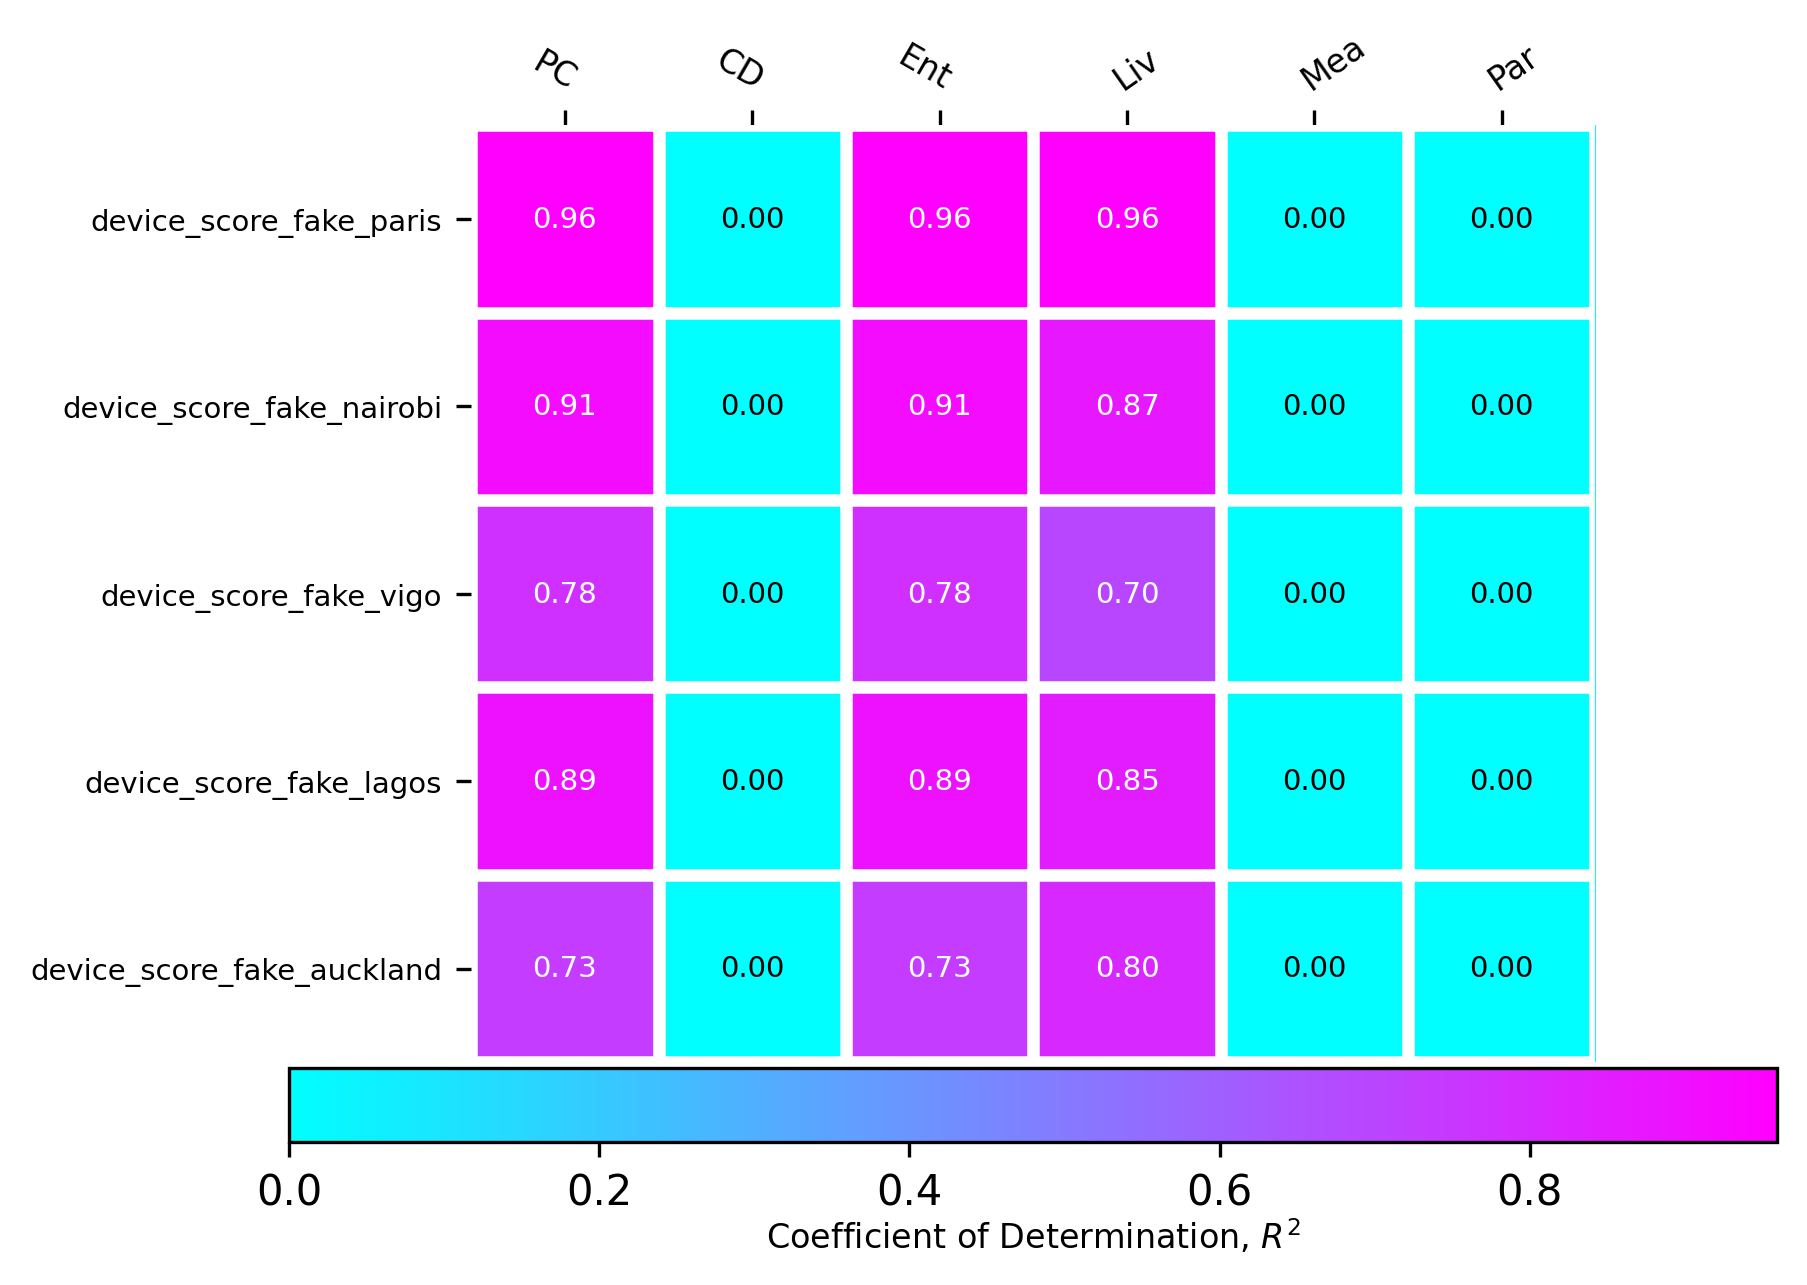

In [9]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)

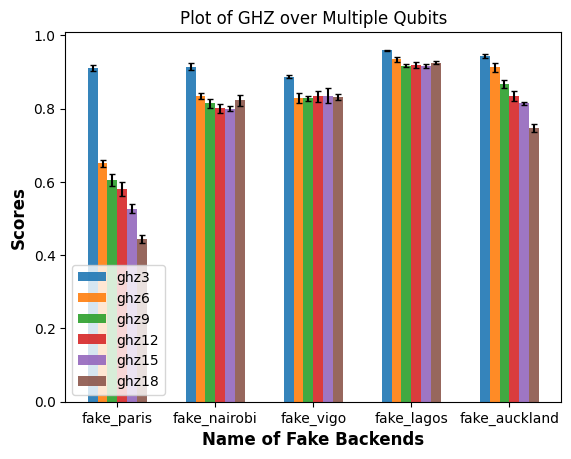

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
all_fake_names=[]
all_score=[]
all_sd=[]
all_ckt=[]
for i in selected_fakes:
    all_fake_names.append(i().name)    
for benchmark, label in benchmarks:
    i=[]
    j=[]
    k=[]
    for ckt,benchmark,backend,job,score,sd in jobs:
        if ckt == label:
            i.append(score)
            j.append(sd)
    all_ckt.append(label)
    all_score.append(i)
    all_sd.append(j)
num_bars = len(all_score)
width = 0.1
x = np.arange(len(all_fake_names)) # x-axis positions for each bar
fig, ax = plt.subplots()
for i in range(num_bars):               # Create bars for each category with appropriate offsets
    ax.bar(x + i * width, all_score[i], width=width, label=f'Bar {i+1}', 
           yerr=all_sd[i],align='center',alpha=0.9,ecolor='black',capsize=2)
ax.set_xlabel('Name of Fake Backends',fontweight ='bold',fontsize = 12)
ax.set_ylabel('Scores',fontweight ='bold',fontsize = 12)
ax.set_title('Plot of GHZ over Multiple Qubits')
ax.set_xticks(x + (num_bars - 1) * width / 2)
ax.set_xticklabels(all_fake_names)
ax.legend(all_ckt,loc="lower left")
#ax.grid(True)
plt.show()